In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

table = pd.read_csv('Mall_Customers.csv')
X = table.iloc[:,[3,4]].values
table

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


C:\Users\amanj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


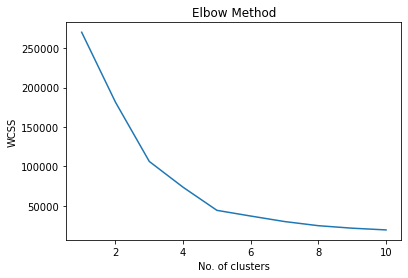

In [14]:
#Performing Elbow Method to get the No. of clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.ylabel("WCSS")
plt.xlabel("No. of clusters")
plt.title("Elbow Method")
plt.show()

#We will select K=5 as seen in the below graph

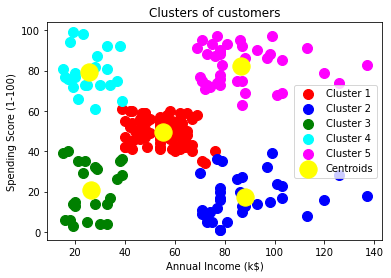

In [30]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

#PLotting the clusters
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0 , 1], s = 100, c= "red", label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1 , 1], s = 100, c= "blue", label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2 , 1], s = 100, c= "green", label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3 , 1], s = 100, c= "cyan", label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4 , 1], s = 100, c= "magenta", label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()